# Распределение Рэлея
Распределение Рэлея — это распределение вероятностей случайной величины 
$$
f(x;\sigma )={\frac {x}{\sigma ^{2}}}\exp \left(-{\frac {x^{2}}{2\sigma ^{2}}}\right),x\geqslant 0,\sigma >0,
$$
p-норма (норма Гёльдера) для вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ вычисляется по формуле:

$$
\left\Vert x \right\Vert_{p} = \left( \sum_{i=1}^n \left| x_{i} \right|^{p} \right)^{1 / p},~p \geq 1.
$$

где $\sigma$ — параметр масштаба. Соответствующая функция распределения имеет вид
$${\displaystyle {\mathsf {P}}(X\leqslant x)=\int \limits _{0}^{x}f(\xi )\,d\xi =1-\exp \left(-{\frac {x^{2}}{2\sigma ^{2}}}\right),x\geqslant 0.} {\mathsf  P}(X\leqslant x)=\int \limits _{0}^{x}f(\xi )\,d\xi =1-\exp \left(-{\frac  {x^{2}}{2\sigma ^{2}}}\right),x\geqslant 0.$$

Введено впервые в 1880 г. Джоном Уильямом Стреттом (лордом Рэлеем) в связи с задачей сложения гармонических колебаний со случайными фазами.

### Применение
- В задачах о пристрелке пушек. Если отклонения от цели для двух взаимно перпендикулярных направлений нормально распределены и некоррелированы, координаты цели совпадают с началом координат, то, обозначив разброс по осям как $X$ и $Y$, получим выражение для величины промаха в виде ${\displaystyle R={\sqrt {{{X}^{2}}+{{Y}^{2}}}}} R={\sqrt  {{{X}^{{2}}}+{{Y}^{{2}}}}}$. В этом случае величина ${\displaystyle R}$ имеет распределение Рэлея.
- В радиотехнике для описания амплитудных флуктуаций радиосигнала.
- Плотность распределения излучения абсолютно чёрного тела по частотам.


### Графики
                                                    Плотность вероятности:
![Плотность вероятности](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Rayleigh_distributionPDF.png/325px-Rayleigh_distributionPDF.png)

                                                    Функция распределения:
![Плотность вероятности](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Rayleigh_distributionCDF.png/325px-Rayleigh_distributionCDF.png)


# Выполнение

In [158]:
#Подключение необходимых библиотек и модулей

from scipy.stats import rayleigh
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

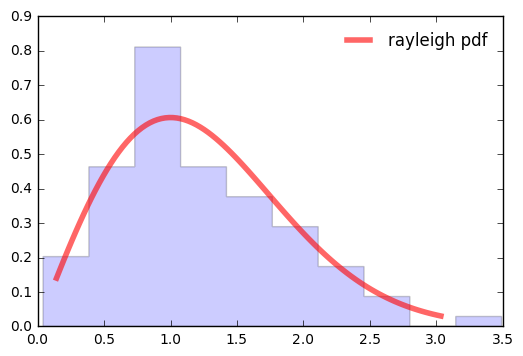

In [237]:
#Генерация выборки объёма 1000, построение гистограммы и теоретической плотности распределения (Probability density function == pdf)

fig, ax = plt.subplots(1, 1)
x = np.linspace(rayleigh.ppf(0.01),rayleigh.ppf(0.99), 100)
ax.plot(x, rayleigh.pdf(x),'r-', lw=4, alpha=0.6, label='rayleigh pdf')
r = rayleigh.rvs(size=100)
ax.hist(r, bins = 10, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [188]:
#Определение функции нормального распределения

def get_norm_distr( x, disp, avg ):
    norm_func = []
    for val in x:
        val1 = 1 / ( np.sqrt(disp) * np.sqrt( 2 * np.pi ) )
        val2 = np.power(np.e, - np.power(( val - avg),2)/(2*disp) )
        norm_func.append(val1*val2)
    return norm_func

In [214]:
#Определение функции, возвращающей среднее из 1000 выборок размером rvs_size

def get_avg_values( rvs_size ):
    avg_values = []
    i = 0
    while i<1000:
        i += 1
        r = rayleigh.rvs(size=rvs_size)
        avg_values.append(np.sum(r) / r.size)
    return avg_values

In [231]:
#Определение функции, отображающей гистограмму распределения средних значений и график плотности соответствующего нормального распределения

def draw_graphics( rvs_size ):
    fig, ax = plt.subplots(1, 1)
    avg_values = get_avg_values(rvs_size)
    dispersion = np.var(avg_values)
    val_avg = np.sum(avg_values) / np.size(avg_values)
    x = np.linspace(0.001, 5, 1000);
    ax.plot(x, get_norm_distr(x, dispersion, val_avg),'r-', lw=3, alpha=0.6, label='norm pdf')
    ax.hist(avg_values, bins = 10, normed=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.title('size '+ str(rvs_size))
    plt.show()

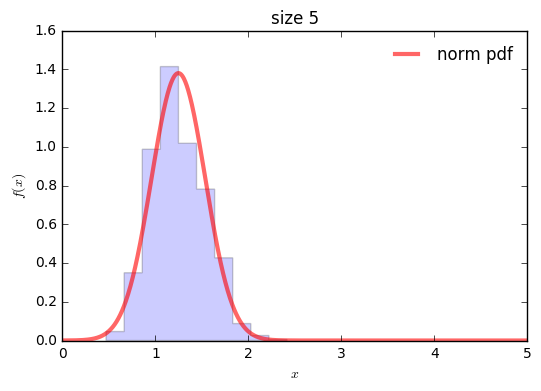

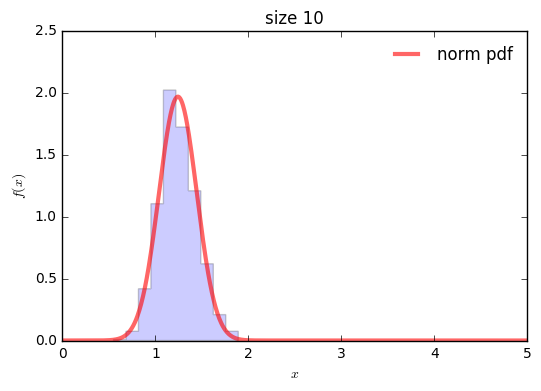

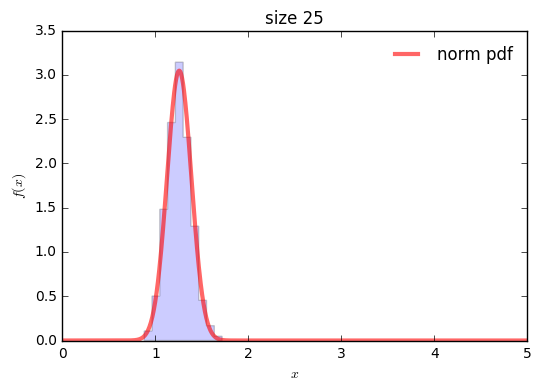

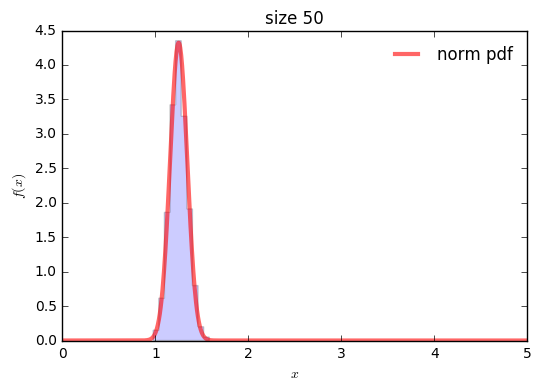

In [238]:
#Построение графиков

draw_graphics(5)
draw_graphics(10)
draw_graphics(25)
draw_graphics(50)

## Выводы


- Чем больше размер выборки, тем лучше гистограмма отображает функцию распределения плотности
- Точность аппроксимации распределения выборочных средних нормальным меняется в лучшую сторону при увеличении размера выборки